## Exploratory Data Analysis (EDA):

### Import Liabraries :

In [1]:
# Our classic imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Load the dataset into a pandas DataFrame:

In [2]:
data_path = "../raw_data/aw_fb_data.csv"

df = pd.read_csv(data_path)

df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [3]:
df.shape

(6264, 20)

In [4]:
df.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [6]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [7]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


### Data Cleaning :

In [8]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
df1.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [9]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [10]:
df1.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)

df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'age'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'height'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'steps'),
  Text(5, 0, 'heart_rate'),
  Text(6, 0, 'calories'),
  Text(7, 0, 'distance'),
  Text(8, 0, 'entropy_heart'),
  Text(9, 0, 'entropy_steps'),
  Text(10, 0, 'resting_heart'),
  Text(11, 0, 'corr_heart_steps'),
  Text(12, 0, 'norm_heart'),
  Text(13, 0, 'intensity_karvonen'),
  Text(14, 0, 'sd_norm_heart'),
  Text(15, 0, 'steps_times_distance')])

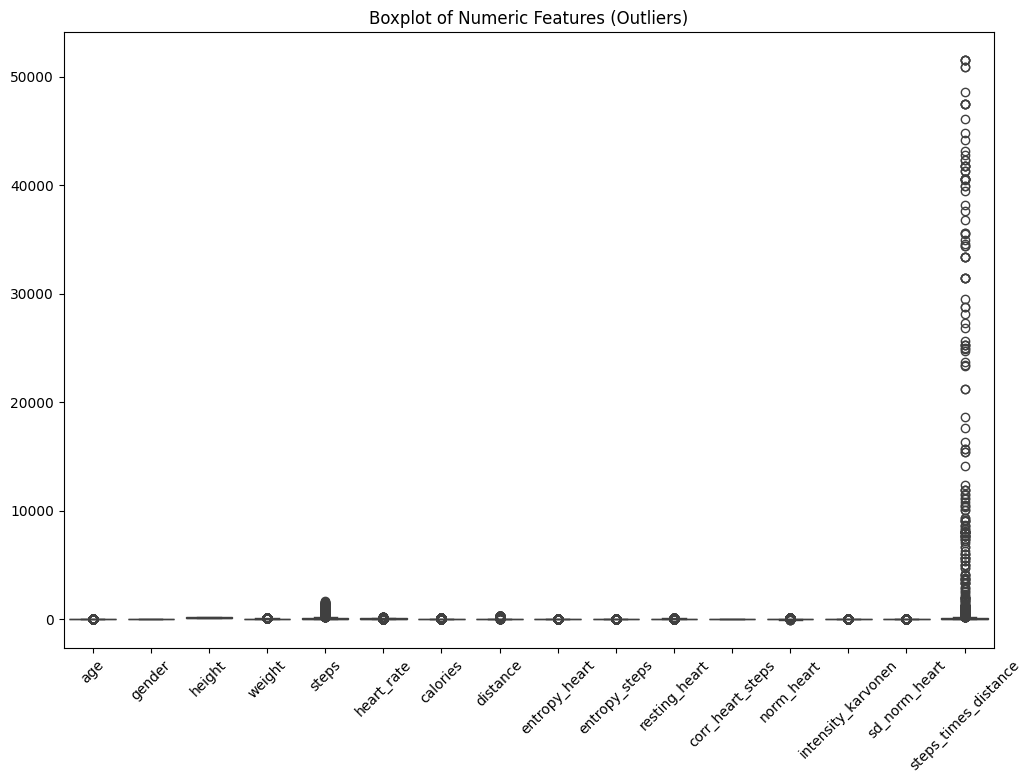

In [11]:
numeric_columns = df1.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Features (Outliers)')
plt.xticks(rotation=45)

In [12]:
df1.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_steps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [13]:
df1 = df1.dropna()

In [14]:
print(df1.duplicated().sum())

10


### Splitting Data as Apple and Fitbit :

In [15]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [16]:
df1_apple.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [17]:
df1_fitbit.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,fitbit,Lying
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,fitbit,Lying
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,fitbit,Lying
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,fitbit,Lying
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,fitbit,Self Pace walk


In [18]:
df1_fitbit['activity'].value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

In [19]:
df1_apple['activity'].value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

<Axes: ylabel='count'>

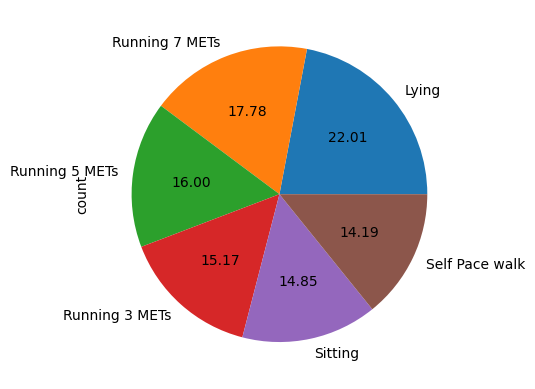

In [20]:
df1['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

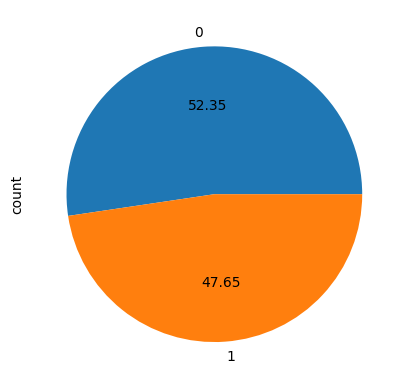

In [21]:
df1['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [22]:
df_num= df1.select_dtypes(include="number")

<Axes: >

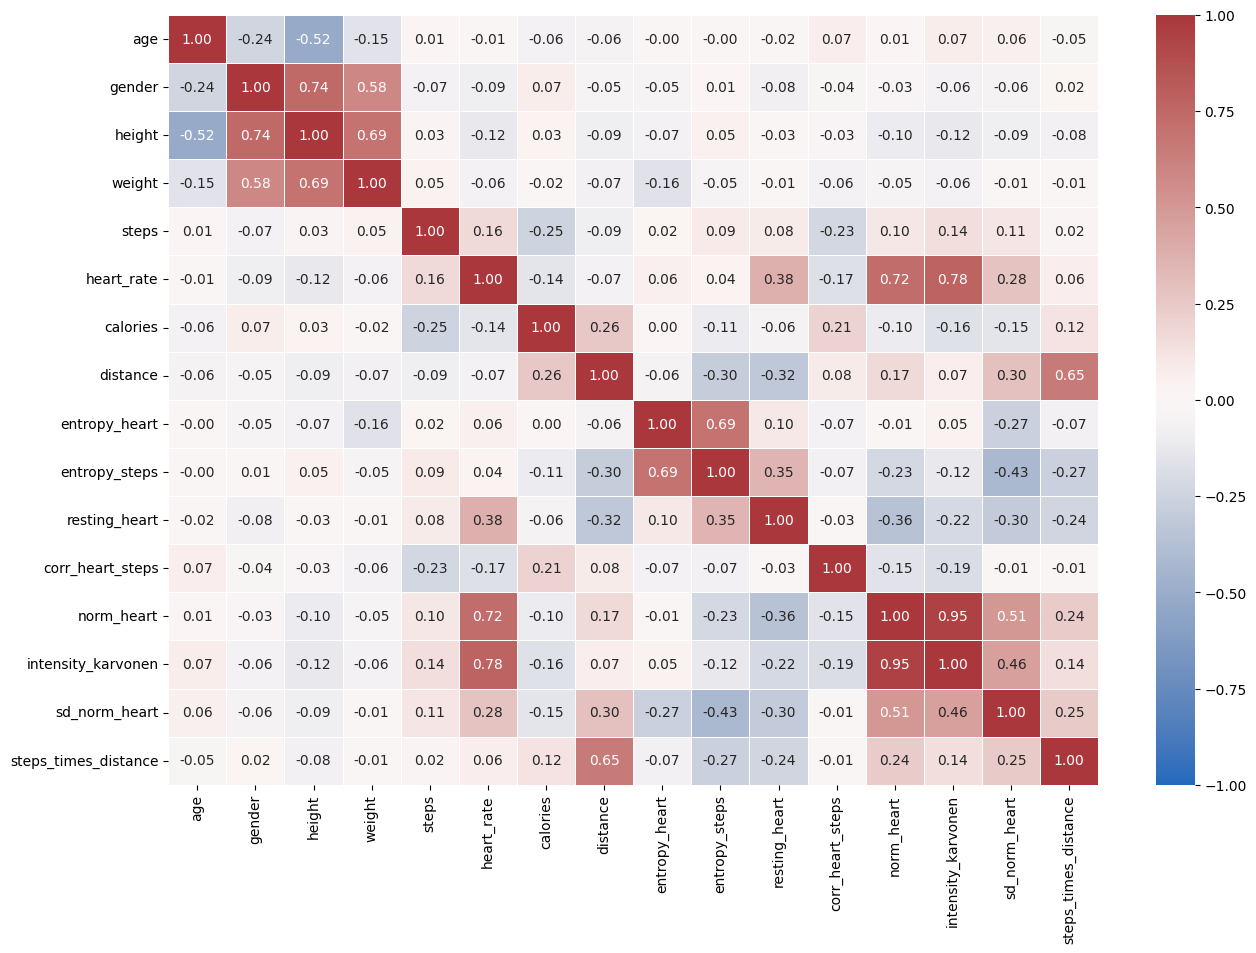

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

<Axes: xlabel='device', ylabel='activity'>

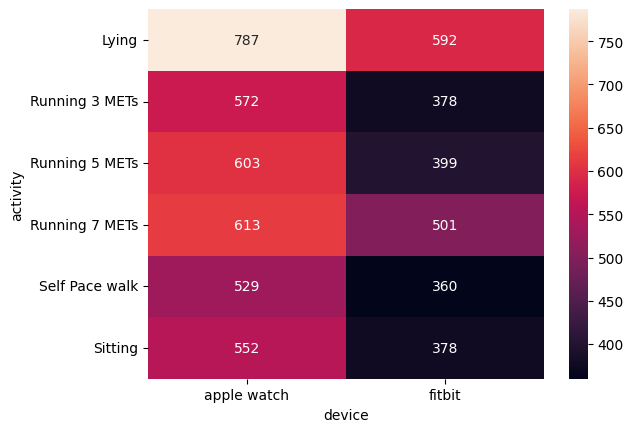

In [24]:
sns.heatmap(pd.crosstab(df1["activity"],df1["device"]),annot=True,fmt='d')

In [25]:
df1.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_steps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

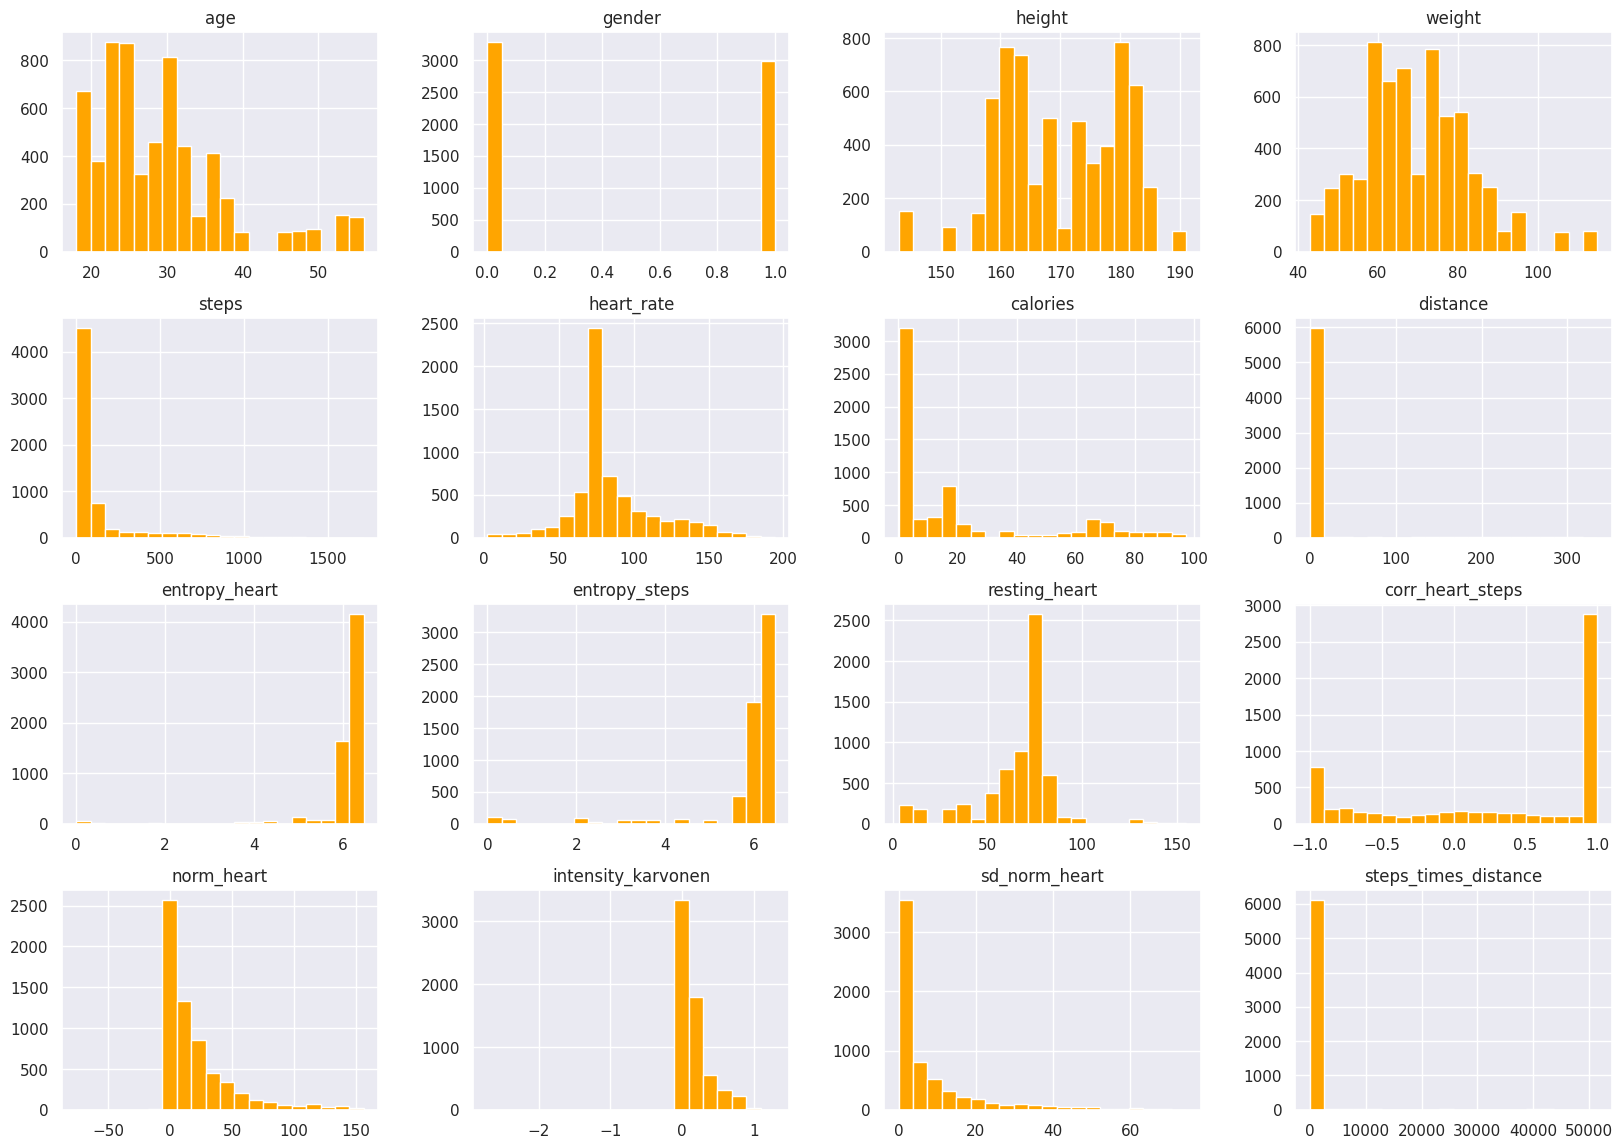

In [26]:
sns.set(font_scale = 1)

df1.hist(bins = 20, color = 'orange', figsize = (20, 14))

## Feature Engineering

### Create a unique identifyer for each participant

In [27]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [28]:
df1.insert(loc=0, column='participant_id', value = df1.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [29]:
df1

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [30]:
df1.groupby('participant_id').count()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
participant_id,,,,,,,,,,,,,,,,,,
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
5,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
6,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
7,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
8,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
9,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [31]:
df1['bmi'] = round(df1.weight / (df1.height/100)**2)
df1.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


### Pairplot with core features

In [32]:
df1.columns

Index(['participant_id', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity', 'bmi'],
      dtype='object')

In [33]:
df1_core_features = df1[['participant_id','age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi']]

df1_core_features

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0
...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0


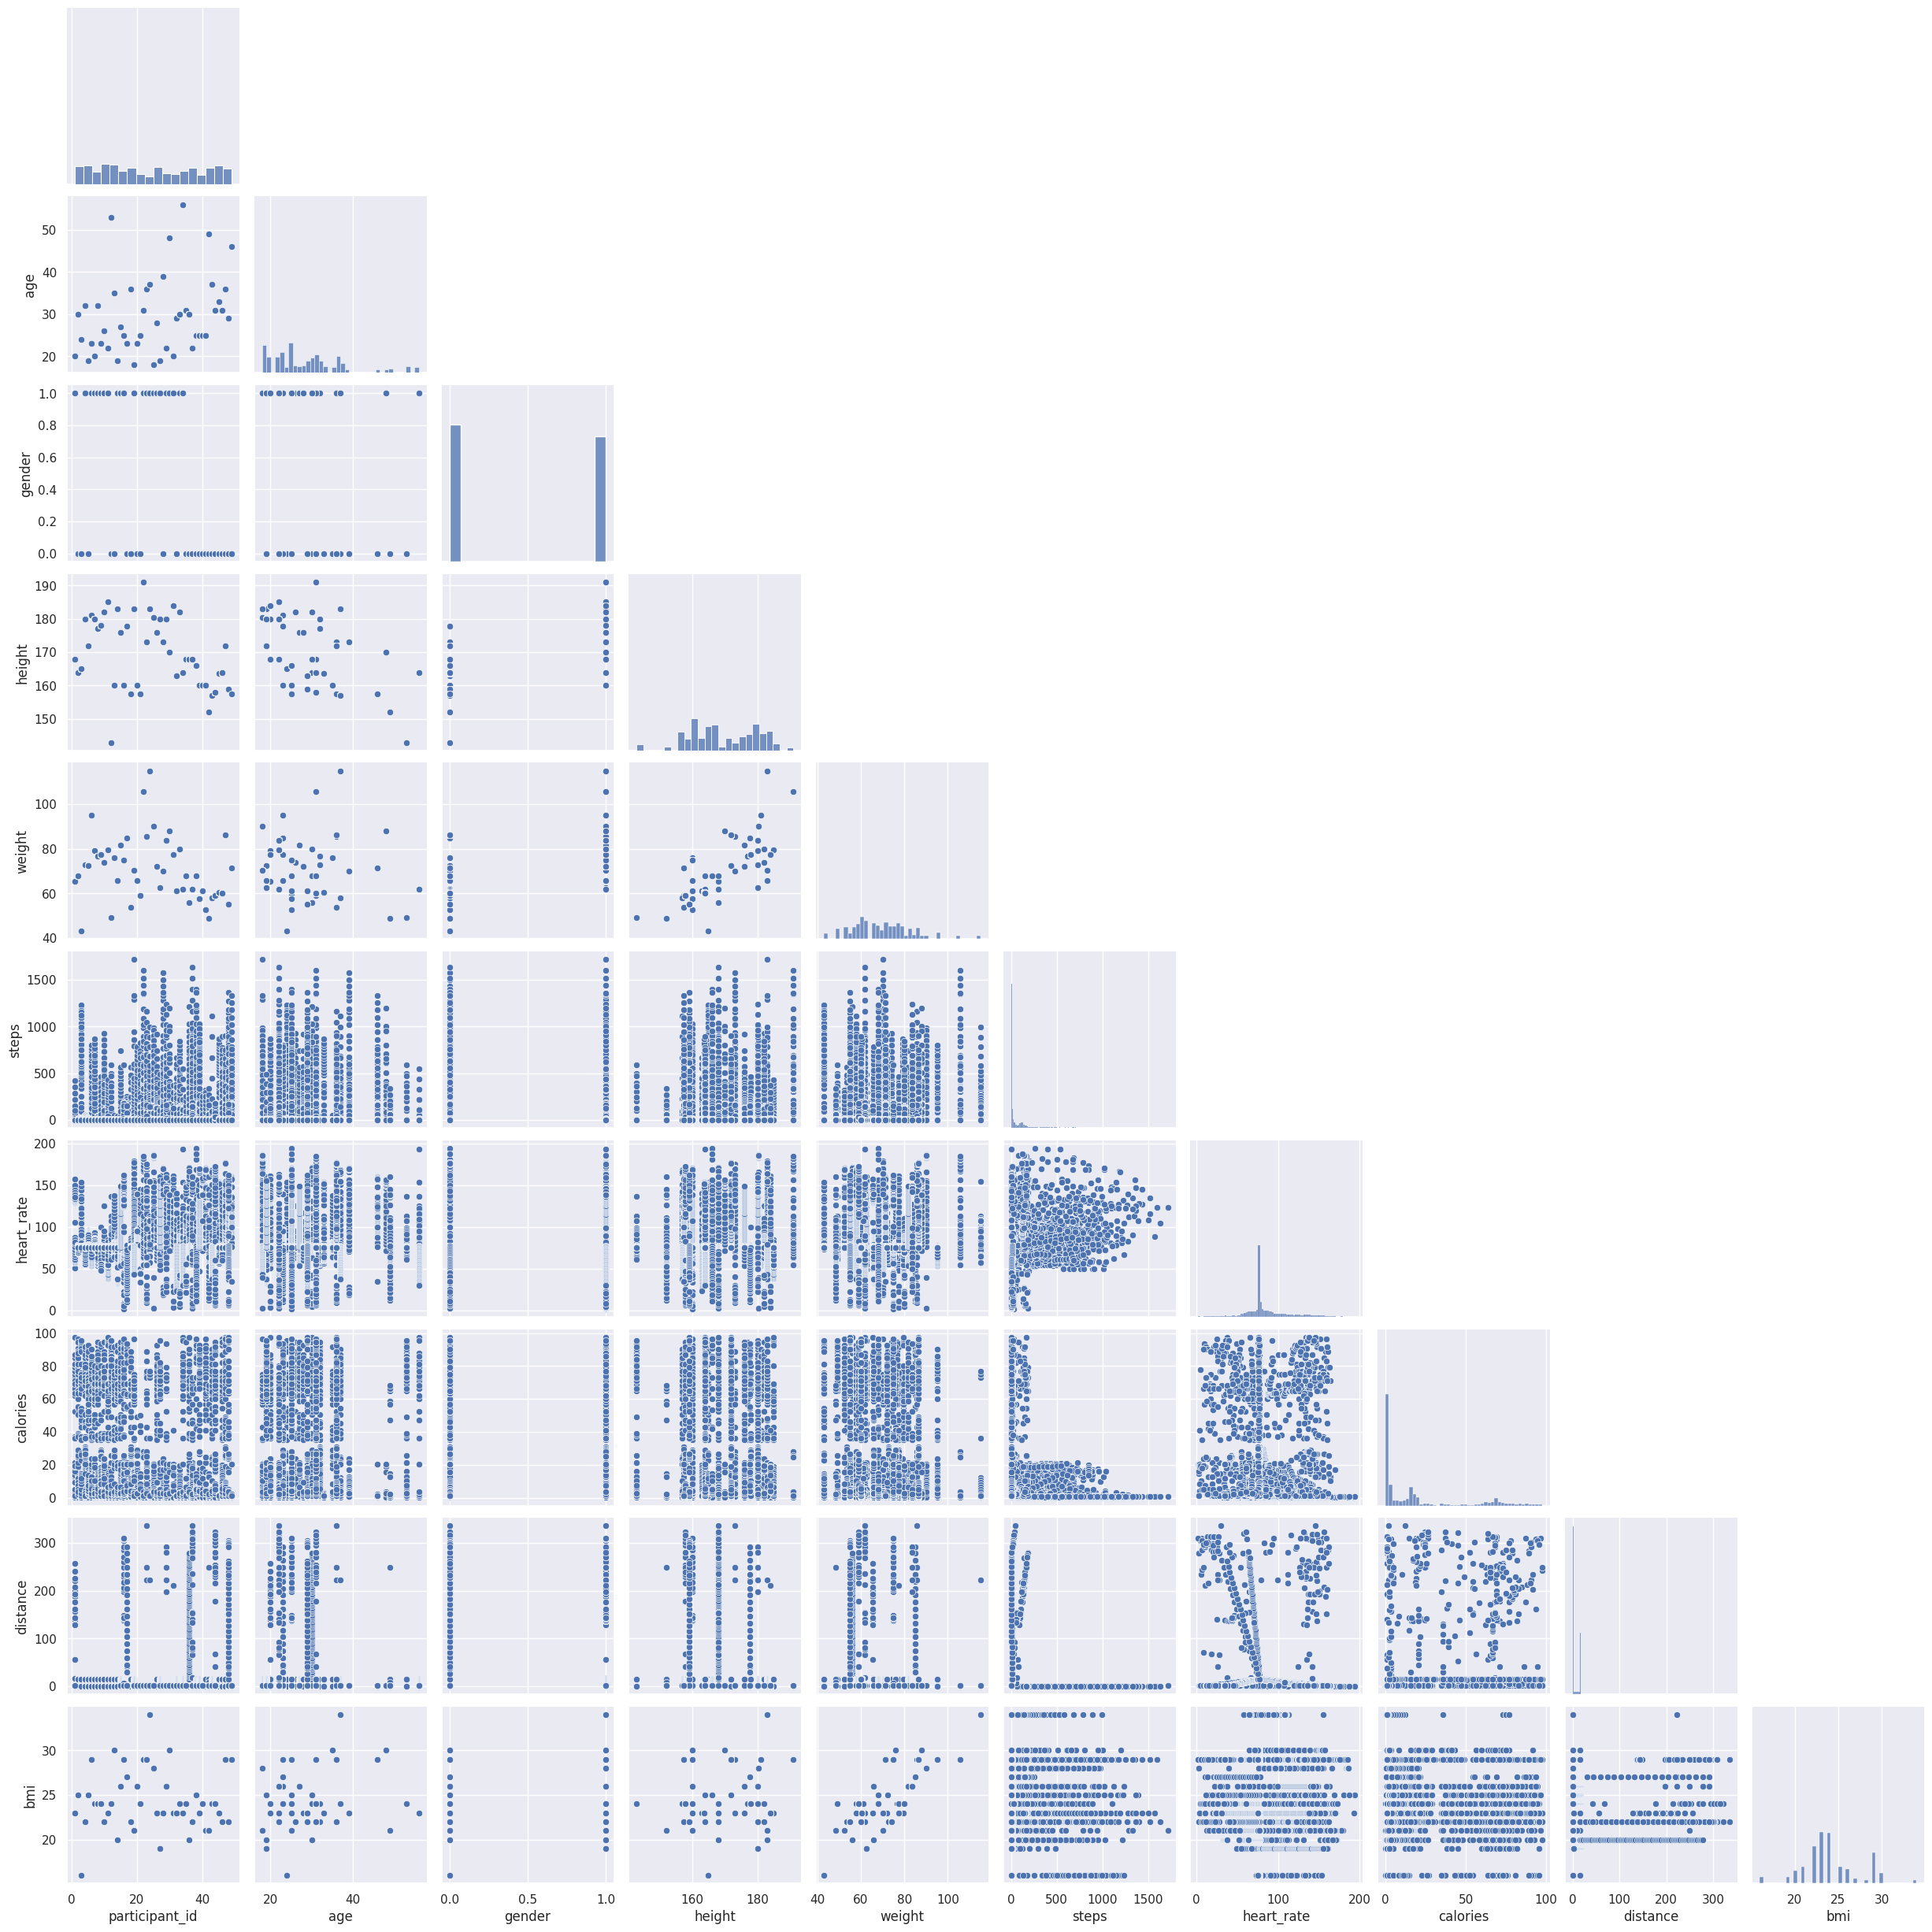

In [34]:
sns.pairplot(df1_core_features, corner = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'participant_id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'gender'),
  Text(3, 0, 'height'),
  Text(4, 0, 'weight'),
  Text(5, 0, 'steps'),
  Text(6, 0, 'heart_rate'),
  Text(7, 0, 'calories'),
  Text(8, 0, 'distance'),
  Text(9, 0, 'bmi')])

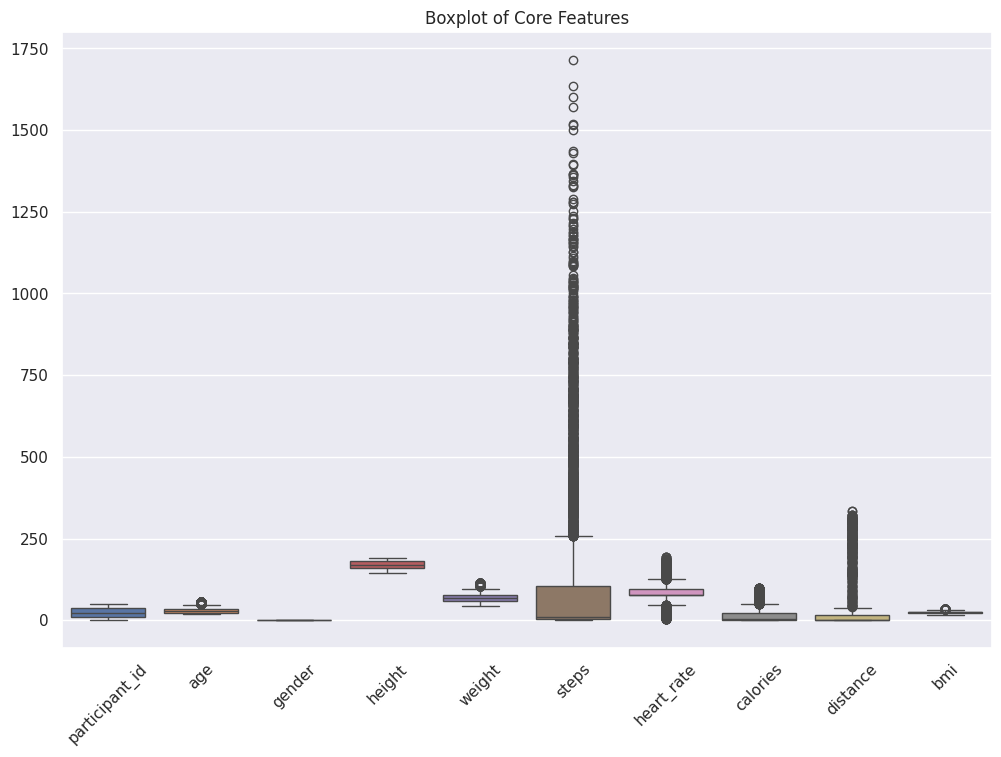

In [35]:
# Plotting boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1_core_features)
plt.title('Boxplot of Core Features')
plt.xticks(rotation=45)

## Features and Target Split

In [36]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [37]:
X_apple = df1_apple.drop(columns = 'activity').drop(columns="device")
y_apple = df1_apple['activity']

X_fitbit = df1_fitbit.drop(columns = 'activity').drop(columns="device")
y_fitbit = df1_fitbit['activity']


## Lable Encoding of Target Value

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
y_apple.unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [40]:
label_encoder_apple = LabelEncoder()
label_encoder_apple.fit(y_apple)
y_apple_encoded = label_encoder_apple.transform(y_apple)

In [41]:
y_apple

0                Lying
1                Lying
2                Lying
3                Lying
4                Lying
             ...      
3651    Running 7 METs
3652    Running 7 METs
3653    Running 7 METs
3654    Running 7 METs
3655    Running 7 METs
Name: activity, Length: 3656, dtype: object

In [42]:
y_fitbit.unique()

array(['Lying', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs',
       'Sitting', 'Running 7 METs'], dtype=object)

In [43]:
label_encoder_fitbit = LabelEncoder()
label_encoder_fitbit.fit(y_fitbit)
y_fitbit_encoded = label_encoder_fitbit.transform(y_fitbit)

## Features scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler_apple = StandardScaler()
df_scaled_apple = pd.DataFrame(scaler_apple.fit_transform(X_apple),columns= scaler_apple.get_feature_names_out())
df_scaled_apple.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.629081,-0.475505,-0.747423,-0.554538,0.453628,0.356003,-0.785936,1.340947,-0.139579,-0.258063,-0.778833,-0.352083,-0.400188
1,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.626468,-0.478417,-0.343014,-0.550378,0.453628,0.356003,-0.785936,1.340947,-0.142830,-0.260757,-0.778833,-0.351973,-0.400188
2,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.623855,-0.475149,0.508426,-0.546218,0.453628,0.356003,-0.785936,1.340947,-0.139181,-0.257734,-0.778833,-0.351856,-0.400188
3,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.621242,-0.471880,0.600567,-0.542057,0.453628,0.356003,-0.785936,1.340947,-0.135533,-0.254710,-0.778833,-0.351731,-0.400188
4,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.618629,-0.468611,0.692708,-0.537897,0.453628,0.356003,-0.785936,1.317761,-0.131884,-0.251686,-0.854109,-0.351600,-0.400188


In [46]:
scaler_fitbit = StandardScaler()
df_scaled_fitbit = pd.DataFrame(scaler_fitbit.fit_transform(X_fitbit),columns= scaler_fitbit.get_feature_names_out())
df_scaled_fitbit.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.787256,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.452279,-0.395318,-0.398064,-0.218929,-0.212811
1,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.813474,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.428906,-0.341733,-0.398064,-0.218929,-0.212811
2,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.716091,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.515718,-0.540761,-0.398064,-0.218929,-0.212811
3,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.690942,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.538136,-0.592158,-0.398064,-0.218929,-0.212811
4,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.873403,-1.066937,-0.482252,0.034291,-1.688549,2.322448,-2.006431,-0.375484,-0.219255,-0.373966,-0.218929,-0.212811


## Train-Split Data(Apple and Fitbit)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple, y_apple_encoded, test_size=0.2, random_state=42)

In [49]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit, y_fitbit_encoded, test_size=0.2, random_state=42)

# Predictive model

## Decision Tree Classifier (Apple)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)

In [51]:
# Train the model
dt_model.fit(X_train_apple, y_train_apple)

DecisionTreeClassifier(random_state=0)

In [52]:
# Prediction
y_apple_pred_dt = dt_model.predict(X_test_apple)

In [53]:
accuracy_score(y_test_apple, y_apple_pred_dt)

0.73224043715847

## Decision Tree Classifier (Fitbit)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(random_state=0)

In [55]:
# Train the model
dt_model2.fit(X_train_fitbit, y_train_fitbit)

DecisionTreeClassifier(random_state=0)

In [56]:
# Prediction
y_fitbit_pred_dt = dt_model2.predict(X_test_fitbit)

In [57]:
accuracy_score(y_test_fitbit, y_fitbit_pred_dt)

0.8505747126436781

## K-NN(Apple)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [59]:
# Train the model
knn_model.fit(X_train_apple, y_train_apple)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Prediction
y_apple_pred_knn = knn_model.predict(X_test_apple)

In [61]:
accuracy_score(y_test_apple, y_apple_pred_knn)

0.75

## K-NN(Fitbit)

In [62]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)

In [63]:
# Train the model
knn_model2.fit(X_train_fitbit, y_train_fitbit)

KNeighborsClassifier(n_neighbors=3)

In [64]:
# Prediction
y_fitbit_pred_knn = knn_model2.predict(X_test_fitbit)

In [65]:
accuracy_score(y_test_fitbit, y_fitbit_pred_knn)

0.7394636015325671

## Random Forest(Apple)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [67]:
# Train the model
rf_model.fit(X_train_apple, y_train_apple)

RandomForestClassifier(random_state=0)

In [68]:
# Prediction
y_apple_pred_rf = rf_model.predict(X_test_apple)

In [69]:
accuracy_score(y_test_apple, y_apple_pred_rf)

0.842896174863388

## Random Forest(Fitbit)

In [70]:
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=0)

In [71]:
# Train the model
rf_model2.fit(X_train_fitbit, y_train_fitbit)

RandomForestClassifier(random_state=0)

In [72]:
# Prediction
y_fitbit_pred_rf = rf_model2.predict(X_test_fitbit)

In [73]:
accuracy_score(y_test_fitbit, y_fitbit_pred_rf)

0.9003831417624522

## Logistic Regression(Apple)

In [74]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')

In [75]:
# Train the model
lr_model.fit(X_train_apple, y_train_apple)

LogisticRegression(random_state=0)

In [76]:
# Prediction
y_apple_pred_lr = lr_model.predict(X_test_apple)

In [77]:
accuracy_score(y_test_apple, y_apple_pred_lr)

0.3620218579234973

## Logistic Regression(Fitbit)

In [78]:
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')

In [79]:
# Train the model
lr_model2.fit(X_train_fitbit, y_train_fitbit)

LogisticRegression(random_state=0)

In [80]:
# Prediction
y_fitbit_pred_lr = lr_model2.predict(X_test_fitbit)

In [81]:
accuracy_score(y_test_fitbit, y_fitbit_pred_lr)

0.421455938697318

## Define most relevant features(Apple)

In [82]:
from sklearn.feature_selection import SelectFromModel


In [83]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

In [84]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_apple.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [85]:
print(top_features)

                 Feature  Importance
13            norm_heart    0.098663
6             heart_rate    0.093461
15         sd_norm_heart    0.091418
7               calories    0.089626
14    intensity_karvonen    0.088860
8               distance    0.078218
12      corr_heart_steps    0.078189
5                  steps    0.077086
16  steps_times_distance    0.070824
0         participant_id    0.046434


## Define most relevant features(Fitbit)

In [86]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model2.feature_importances_

In [87]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_fitbit.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [88]:
print(top_features)

                 Feature  Importance
7               calories    0.161413
5                  steps    0.145834
13            norm_heart    0.109821
16  steps_times_distance    0.108934
8               distance    0.093385
14    intensity_karvonen    0.087555
6             heart_rate    0.083431
15         sd_norm_heart    0.048549
12      corr_heart_steps    0.026108
10         entropy_steps    0.025834


# Predictive Model with core features

In [89]:
core_col = df1_core_features.columns[1:]
core_col

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'bmi'],
      dtype='object')

In [90]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple[core_col], y_apple_encoded, test_size=0.2, random_state=42)

In [91]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit[core_col], y_fitbit_encoded, test_size=0.2, random_state=42)

## Decision Tree Classifier (Apple)

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_apple, y_train_apple)
y_apple_pred_dt = dt_model.predict(X_test_apple)

In [93]:
accuracy_score(y_test_apple, y_apple_pred_dt)

0.7117486338797814

## Decision Tree Classifier (Fitbit)

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(random_state=0)
dt_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_dt = dt_model2.predict(X_test_fitbit)

In [95]:
accuracy_score(y_test_fitbit, y_fitbit_pred_dt)

0.8467432950191571

## K-NN(Apple)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_apple, y_train_apple)
y_apple_pred_knn = knn_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_knn)

0.7103825136612022

## K-NN(Fitbit)

In [97]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_knn = knn_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_knn)

0.7183908045977011

## Random Forest(Apple)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_apple, y_train_apple)
y_apple_pred_rf = rf_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_rf)

0.8210382513661202

## Random Forest(Fitbit)

In [99]:
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_rf = rf_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_rf)

0.8716475095785441

## Logistic Regression(Apple)

In [100]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train_apple, y_train_apple)
y_apple_pred_lr = lr_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_lr)

0.29918032786885246

## Logistic Regression(Fitbit)

In [101]:
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_lr = lr_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_lr)

0.3448275862068966

## Define most relevant features(Apple)

In [102]:
from sklearn.feature_selection import SelectFromModel


In [103]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

In [104]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_apple.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [105]:
print(top_features)

      Feature  Importance
5  heart_rate    0.228181
4       steps    0.179506
7    distance    0.175420
6    calories    0.169547
3      weight    0.066827
0         age    0.060340
2      height    0.058539
8         bmi    0.049341
1      gender    0.012300


## Define most relevant features(Fitbit)

In [106]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model2.feature_importances_

In [107]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_fitbit.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [108]:
print(top_features)

      Feature  Importance
4       steps    0.271779
6    calories    0.226698
5  heart_rate    0.187838
7    distance    0.183680
3      weight    0.034085
2      height    0.032705
0         age    0.031587
8         bmi    0.025265
1      gender    0.006363


# Use of Shapley values to explain individual predictions and to interpret the importance of features in our model 

View the feature importance and confusion matrix to get a basic impression of the model
Just to understand where we stand with the feature importance and to compute the impurity decrease within each tree

# Feature Importances -Apple Watch and Fitbit

Text(0.5, 0, 'Relative Importance')

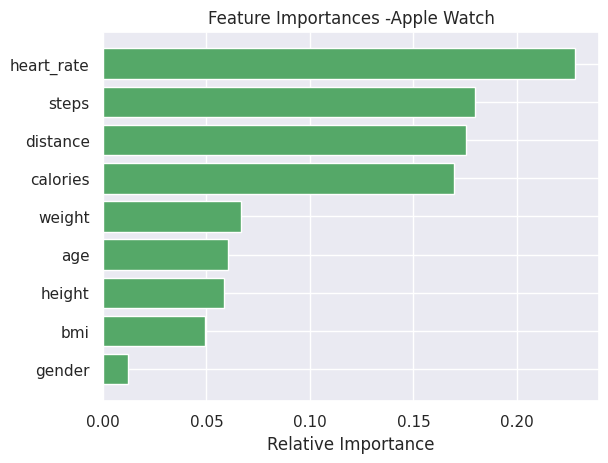

In [109]:
# For Apple Watch
importances = rf_model.feature_importances_
indices = np.argsort(importances)
# features = df1_apple.columns
features = X_train_apple.columns
plt.title('Feature Importances -Apple Watch')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

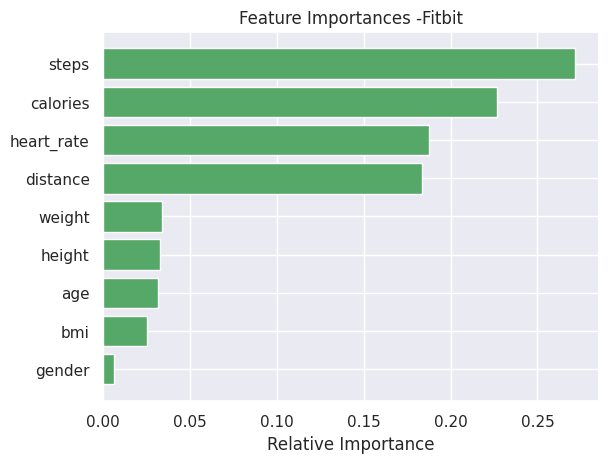

In [110]:
# For Fitbit
importances = rf_model2.feature_importances_
indices = np.argsort(importances)
#features = df1_fitbit.columns
features = X_train_fitbit.columns
plt.title('Feature Importances -Fitbit')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# Confusion matrix - Apple Watch and Fitbit
to visualize the performance of my model and more important to see where the model fails exactly

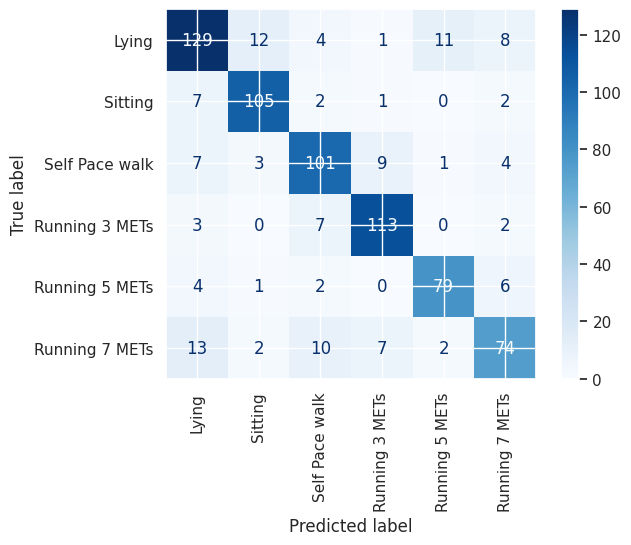

In [111]:
# Compute the confusion matrix for Apple Watch
cm_apple = confusion_matrix(y_test_apple, y_apple_pred_rf)

class_names = ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']

# Create ConfusionMatrixDisplay object
cm_display_apple = ConfusionMatrixDisplay(confusion_matrix=cm_apple, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_apple.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

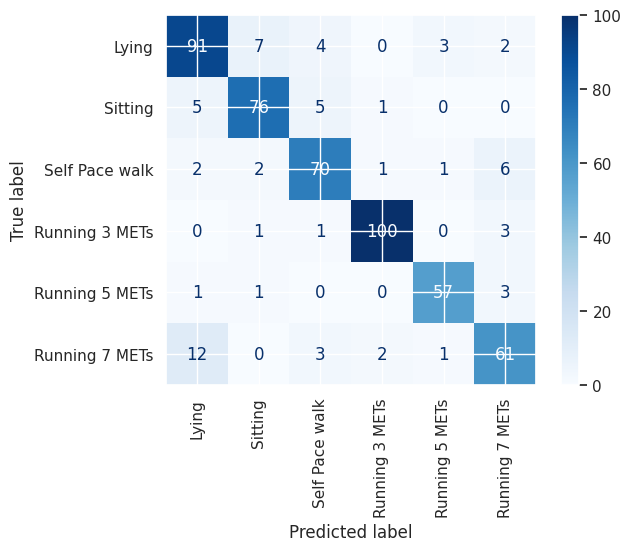

In [112]:
# Compute the confusion matrix for Fitbit
cm_fitbit = confusion_matrix(y_test_fitbit, y_fitbit_pred_rf)

class_names = ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']

# Create ConfusionMatrixDisplay object
cm_display_fitbit = ConfusionMatrixDisplay(confusion_matrix=cm_fitbit, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_fitbit.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# SHAP Summary Plot with Core Features - Apple Watch and Fitbit
SHAP values of a model’s output explain how features impact the output of the model

In [113]:
# compute SHAP values for Apple Watch
explainer = shap.TreeExplainer(rf_model)
shap_values_apple = explainer.shap_values(X_train_apple)

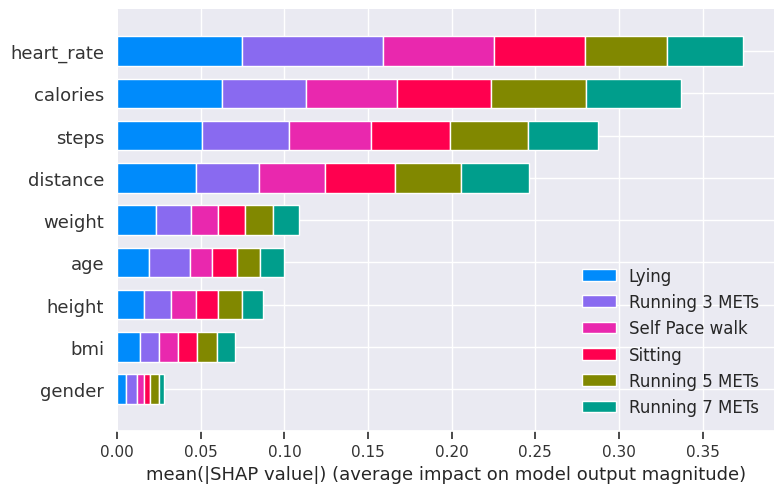

In [114]:
# Now we can plot relevant plots that will help us analyze the model for Apple Watch
shap.summary_plot(shap_values_apple, X_train_apple.values, plot_type="bar", class_names= class_names, feature_names = X_train_apple.columns)

In this plot for Apple Watch, the impact of a feature on the classes is stacked to create the feature importance plot. 
Thus, if we create features in order to differentiate a particular class from the rest, that is the plot where we can see it. 
In other words, the summary plot for multiclass classification can show us what the machine managed to learn from the features.

In the example below we can see that the classe 'Running 7 METs' hardly uses the feature 'gender'. 
We can also see that the classes 'Self Pace Walk' and 'Sitting' use the same features equally most of the time. 
That is the reason the confusion between them is relatively high. 
In order to separate better between the 'Self Pace Walk' and 'Sitting classes', one needs to generate new features that uniquely be dedicated towards these classes.

In [115]:
# compute SHAP values for Fitbit
explainer = shap.TreeExplainer(rf_model2)
shap_values_fitbit = explainer.shap_values(X_train_fitbit)

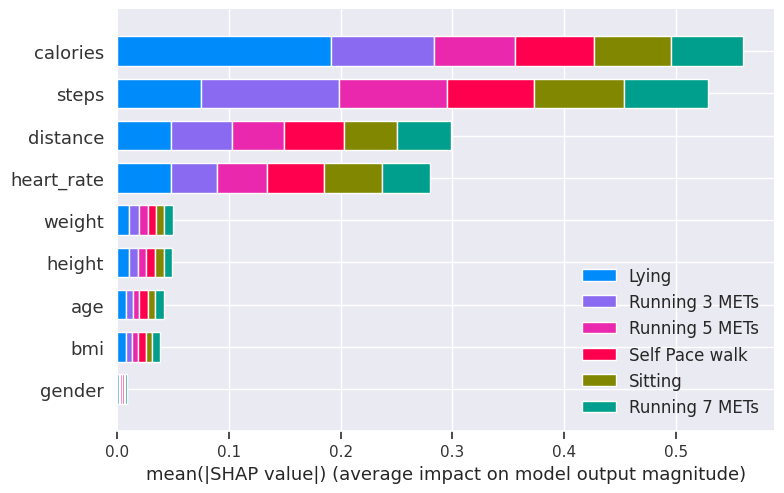

In [116]:
# Now we can plot relevant plots that will help us analyze the model for Fitbit
shap.summary_plot(shap_values_fitbit, X_train_fitbit.values, plot_type="bar", class_names= class_names, feature_names = X_train_fitbit.columns)

# summary plot of a specific class for Apple Watch and Fitbit

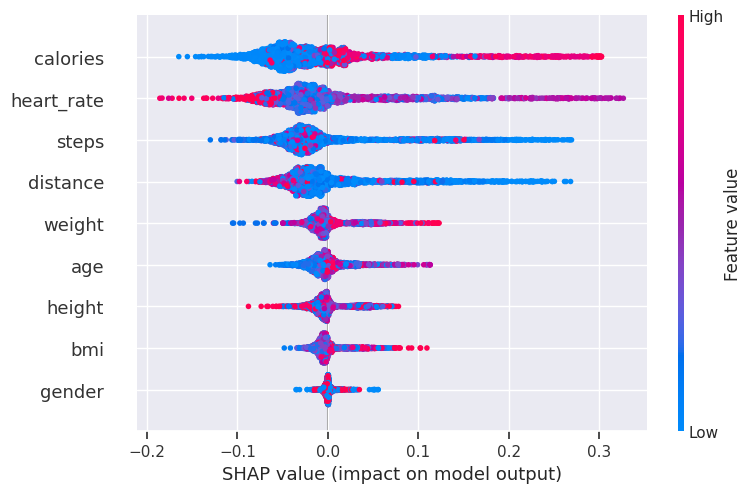

In [117]:
#Let's also see the summary_plot of a specific class for Apple Watch
shap.summary_plot(shap_values_apple[1], X_train_apple.values, feature_names = X_train_apple.columns)

The summary plot above for Apple Watch combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. You can see that the feature 'gender', being the least important feature, has low Shapley values. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.
In the summary plot, we see the first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

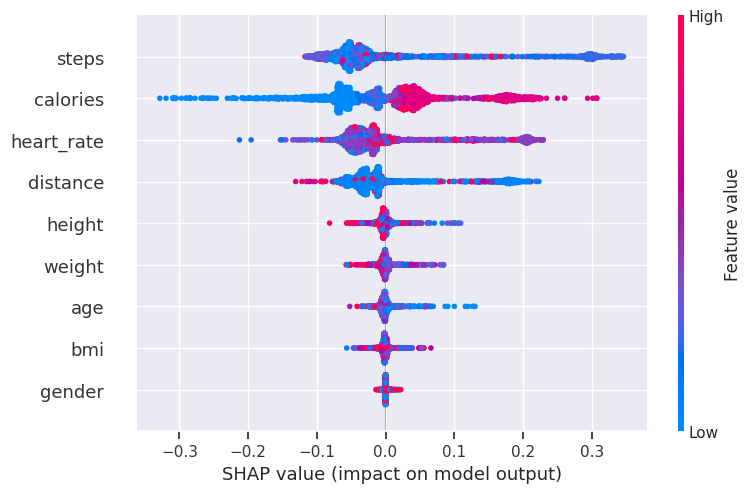

In [118]:
#Let's also see the summary_plot of a specific class for Fitbit
shap.summary_plot(shap_values_fitbit[1], X_train_fitbit.values, feature_names = X_train_fitbit.columns)

# SHAP Dependence Plot -Apple Watch and Fitbit

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic, or more complex.

The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome. The PDP assumes that the first feature is not correlated with the second feature. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible.

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. 

Each dot is a single prediction (row) from the dataset.
The x-axis is the actual value from the dataset.
The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

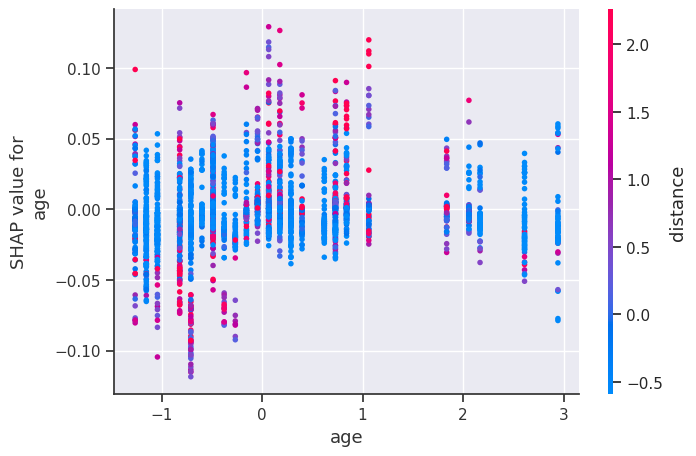

In [119]:
# If we pass a numpy array instead of a data frame then we need to pass the feature names separately
shap.dependence_plot(0, shap_values_apple[0], X_train_apple.values, feature_names=X_train_apple.columns)

In the example above we can see a clear vertical pattern of coloring for the interaction between the features, 'age' and 'distance'.

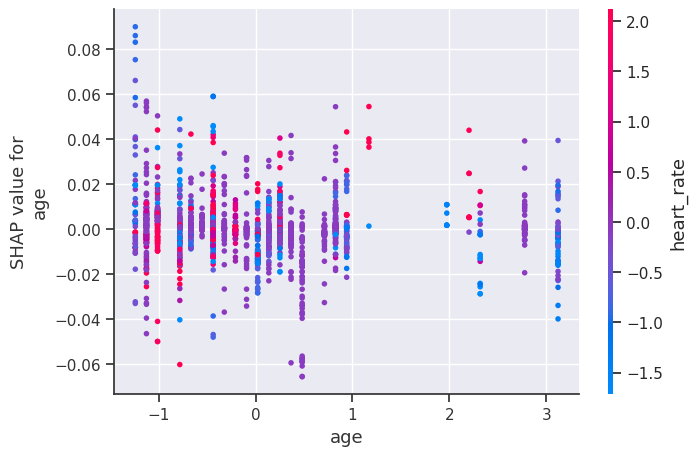

In [120]:
shap.dependence_plot(0, shap_values_fitbit[0], X_train_fitbit.values, feature_names=X_train_fitbit.columns)

# SHAP Force plot for Apple Watch and Fitbit
Force plot gives us the explainability of a single model prediction. In this plot, we can see how features contributed to the model’s prediction for a specific observation. It is very convenient to use for error analysis or a deep understanding of a particular case.

In [121]:
# Run the following command. Needed for some visualizations.
shap.initjs()

In [122]:
# For Apple Watch
explainer = shap.TreeExplainer(rf_model)
i=8
shap.force_plot(explainer.expected_value[0], shap_values_apple[0][i], X_train_apple.values[i], feature_names = X_train_apple.columns)

From the above plot we can see:

The model predict_proba value: 0.02
The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = 0.2122
The numbers on the plot arrows are the value of the feature for this instance. 
Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.

In [123]:
# For Fitbit
explainer = shap.TreeExplainer(rf_model2)
i=8
shap.force_plot(explainer.expected_value[0], shap_values_fitbit[0][i], X_train_fitbit.values[i], feature_names = X_train_fitbit.columns)

# SHAP waterfall plot for Apple Watch and Fitbit
The waterfall plot is another local analysis plot of a single instance prediction. Let’s take instance number 8 as an example:

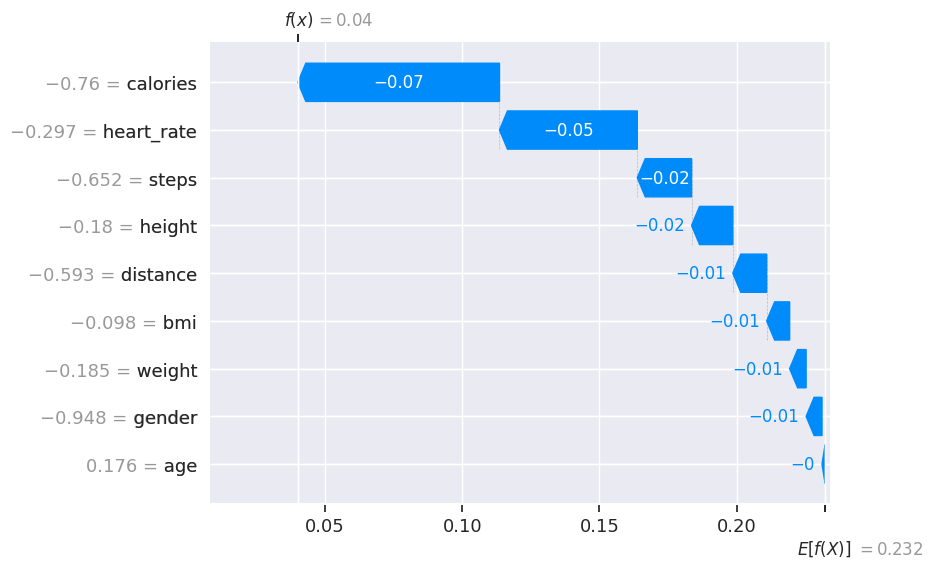

In [124]:
# For Apple Watch
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values_apple[0][row], base_values=explainer.expected_value[0], data=X_test_apple.iloc[row], feature_names=X_test_apple.columns.tolist()))

In the above plot for Apple Watch, f(x) is the model predict_proba value: 0.04.
E[f(x)] is the base value = 0.232.
On the left are the features value and on the arrows the feature contribution to the prediction.
Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

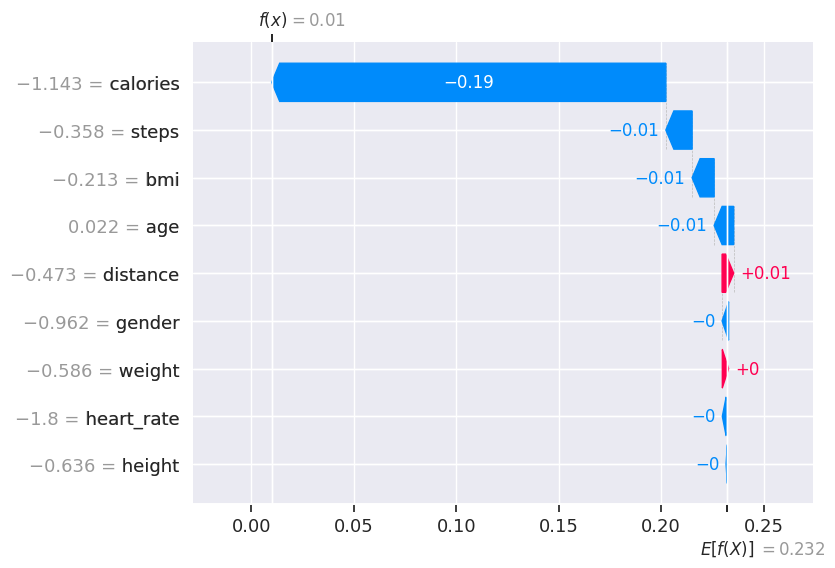

In [125]:
# For Fitbit
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values_fitbit[0][row], base_values=explainer.expected_value[0], data=X_test_fitbit.iloc[row], feature_names=X_test_fitbit.columns.tolist()))